# Importing necessary libraries

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [37]:
 from sklearn.model_selection import RepeatedKFold


In [38]:
from sklearn.linear_model import LinearRegression


In [39]:
df=pd.read_csv("New2010to2015.csv")

In [40]:
df.head()

,Time,Area ID,Victim Age,Victim Sex,Victim Descent,Premise Description,Status Code,LAT,LON
0,2300,20,32,1,8,106,2,34.0454,-118.3157
1,1800,18,38,1,6,106,2,33.9572,-118.2717
2,2230,11,29,0,6,83,2,34.1211,-118.2048
3,1600,16,23,1,8,106,2,34.2410,-118.3987
4,1600,19,46,1,8,106,2,34.3147,-118.4589


In [41]:
df.columns

Index(['Time', 'Area ID', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Description', 'Status Code', 'LAT', 'LON'],
      dtype='object')

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import randint

# prep
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import binarize, LabelEncoder, MinMaxScaler

# models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

# Validation libraries
from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error, precision_recall_curve
from sklearn.model_selection import cross_val_score

#Neural Network
from sklearn.neural_network import MLPClassifier
#from sklearn.grid_search import RandomizedSearchCV

#Bagging
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

#Naive bayes
from sklearn.naive_bayes import GaussianNB 

#Stacking
from mlxtend.classifier import StackingClassifier

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

In [43]:
X=df.drop(['LAT', 'LON'], axis=1)


In [44]:
df.columns

Index(['Time', 'Area ID', 'Victim Age', 'Victim Sex', 'Victim Descent',
       'Premise Description', 'Status Code', 'LAT', 'LON'],
      dtype='object')

In [45]:
y=df[['LAT', 'LON']]

# Creating test and train dataset 

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)


In [47]:
X_train=np.array(X_train)
y_train=np.array(y_train)
X_test=np.array(X_test)
y_test=np.array(y_test)

# Linear Regression for multi output regression

In [48]:
# define model
model = LinearRegression()
# fit model
model.fit(X_train, y_train)
# make a prediction
#row = [66, 130100982.0,1.0, 1.0, 171.0, 5.0, 37.0, 1.0, 7.0,175.0,64.0,4.0,2.0,47551.0]
row=X_test
y_pred = model.predict(row)
# summarize prediction
print(y_pred[0])

[  34.04091963 -118.29764602]


# MSE and R squared 

In [49]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
#r_squared = r2_score([[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]])
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 82.95212511842809
r2 = 0.1043777694953858


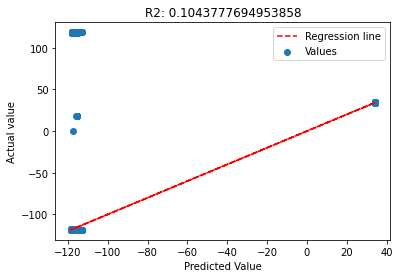

In [50]:
plt.plot((model.predict(X_test).reshape(-1,1)).flatten(),
            (model.predict(X_test).reshape(-1,1)).flatten(),
            '--',color = 'red',label = 'Regression line')
plt.scatter((model.predict(X_test).reshape(-1,1)).flatten(),
               y_test,label = 'Values')

plt.title('Regression model')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.legend()
plt.title('R2: ' + str(r2_score(y_test, y_pred)))

plt.show()

In [51]:
from sklearn.metrics import accuracy_score


#  K Nearest Neighbours for multioutput regression

In [52]:
from sklearn.neighbors import KNeighborsRegressor

In [53]:
# define model
model = KNeighborsRegressor()
# fit model
model.fit(X_train, y_train)
# make a prediction
#row = [66, 130100982.0,1.0, 1.0, 171.0, 5.0, 37.0, 1.0, 7.0,175.0,64.0,4.0,2.0,47551.0]
row=X_test
y_pred = model.predict(row)
# summarize prediction
print(y_pred[0])

[  34.04936 -118.2845 ]


# MSE and R squared 

In [54]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
#r_squared = r2_score([[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]])
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 94.80745923653562
r2 = 0.07422575045345708


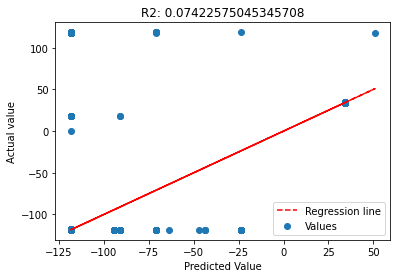

In [55]:
plt.plot((model.predict(X_test).reshape(-1,1)).flatten(),
            (model.predict(X_test).reshape(-1,1)).flatten(),
            '--',color = 'red',label = 'Regression line')
plt.scatter((model.predict(X_test).reshape(-1,1)).flatten(),
               y_test,label = 'Values')

plt.title('Regression model')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.legend()
plt.title('R2: ' + str(r2_score(y_test, y_pred)))

plt.show()

# Decision tree for multioutput regression

In [56]:

# decision tree for multioutput regression
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor

In [57]:
# define model
model = DecisionTreeRegressor()
# fit model
model.fit(X_train, y_train)
# make a prediction
#row = [66, 130100982.0,1.0, 1.0, 171.0, 5.0, 37.0, 1.0, 7.0,175.0,64.0,4.0,2.0,47551.0]
row=X_test
y_pred = model.predict(row)
# summarize prediction
print(y_pred[0])

[  34.0495 -118.2494]


#  MSE and R squared 

In [58]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
#r_squared = r2_score([[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]])
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 166.92768779495435
r2 = -0.12145510185751318


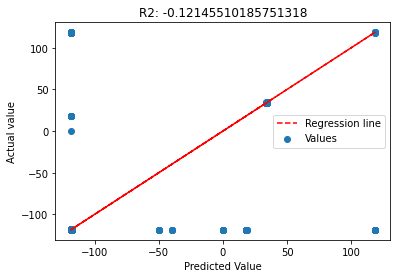

In [59]:
plt.plot((model.predict(X_test).reshape(-1,1)).flatten(),
            (model.predict(X_test).reshape(-1,1)).flatten(),
            '--',color = 'red',label = 'Regression line')
plt.scatter((model.predict(X_test).reshape(-1,1)).flatten(),
               y_test,label = 'Values')

plt.title('Regression model')
plt.xlabel('Predicted Value')
plt.ylabel('Actual value')
plt.legend()
plt.title('R2: ' + str(r2_score(y_test, y_pred)))

plt.show()

# SVM

In [60]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold

In [61]:
from sklearn.svm import LinearSVR


In [62]:
from sklearn.multioutput import MultiOutputRegressor


In [63]:

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)

In [64]:
# example of evaluating direct multioutput regression with an SVM model
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

In [65]:

# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# fit the model on the whole dataset
wrapper.fit(X_train, y_train)
# make a single prediction
row = X_test
y_pred = wrapper.predict(row)
# summarize the prediction
print('Predicted: %s' % y_pred[0])

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Predicted: [  34.03557619 -119.20152951]


C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [66]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
#r_squared = r2_score([[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]])
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 84.20673328446935
r2 = -0.003326963087095347


# Chained Multioutput regression

In [68]:
from sklearn.multioutput import RegressorChain


In [69]:

# define base model
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model, order=[0,1])

In [70]:

# example of making a prediction with the chained multioutput regression model
from sklearn.datasets import make_regression
from sklearn.multioutput import RegressorChain
from sklearn.svm import LinearSVR

# define base model
model = LinearSVR()
# define the chained multioutput wrapper model
wrapper = RegressorChain(model)
# fit the model on the whole dataset
wrapper.fit(X_train, y_train)
# make a single prediction
row = X_test
y_pred = wrapper.predict(row)
# summarize the prediction
print('Predicted: %s' % y_pred[0])

C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Predicted: [  34.04686168 -118.51672474]


C:\Users\apurv\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [71]:
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
mean_squared_error = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
#r_squared = r2_score([[1,2],[3,4],[5,6]],[[1,2],[3,4],[5,6]])
print('mse = {}'.format(mean_squared_error))
print('r2 = {}'.format(r_squared))

mse = 83.39554921050501
r2 = 0.06151877213566542
